# Discritization

In [34]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd

In [2]:
df= sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
# checking the missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
#impute missing values with mean in age and deck column
df['age']=df['age'].fillna(df['age'].mean())
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
# also imupte the missing value of deck column
df['deck']=df['deck'].fillna(df['deck'].mode()[0])



In [11]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [28]:
# age discritization
age_discretizer=KBinsDiscretizer(n_bins=2,encode='ordinal',strategy='uniform')
df['age_bin']=age_discretizer.fit_transform(df[['age']])
df.head()

c:\Users\talim\miniconda3\envs\python_ml\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin
0,0,3,male,1.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,0.0
1,1,1,female,2.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0
2,1,3,female,1.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,0.0
3,1,1,female,2.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0
4,0,3,male,2.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,1.0


<Axes: xlabel='age', ylabel='Count'>

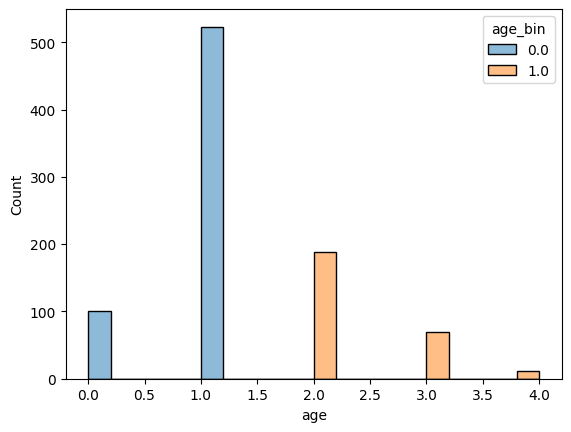

In [31]:
sns.histplot(df,x='age', hue='age_bin')

<Axes: xlabel='age', ylabel='Count'>

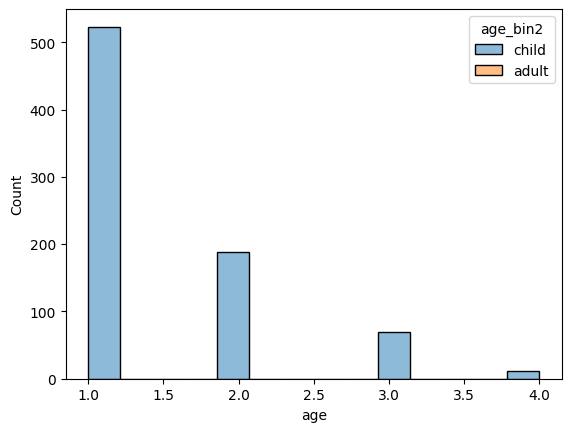

In [36]:
# pandas methoede for manual binning
df['age_bin2']=pd.cut(df['age'],bins=[0,10,20],labels=['child','adult'])
sns.histplot(df, x= 'age', hue='age_bin2')


<Axes: xlabel='age', ylabel='Count'>

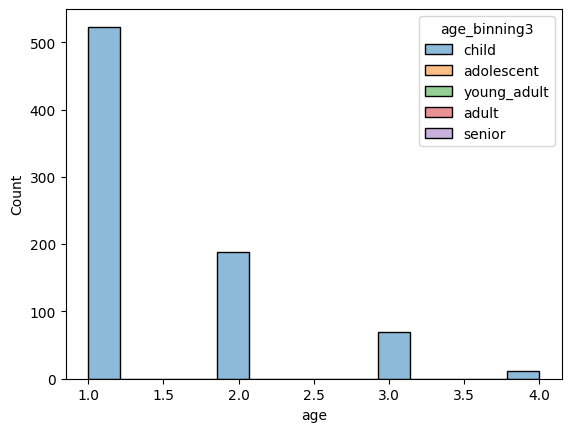

In [37]:
# define the bins
bins= [0,10, 18, 30,50, 80]

# create the labels
labels= ['child', 'adolescent', 'young_adult', 'adult', 'senior']

# binning
df['age_binning3']=pd.cut(df['age'],bins=bins,labels=labels)
sns.histplot(df, x= 'age', hue='age_binning3')
